In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [0]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 17s 336us/sample - loss: 1.5736 - accuracy: 0.4255 - val_loss: 1.3048 - val_accuracy: 0.5317
Epoch 2/15
50000/50000 [==============================] - 16s 320us/sample - loss: 1.2732 - accuracy: 0.5435 - val_loss: 1.1139 - val_accuracy: 0.6004
Epoch 3/15
50000/50000 [==============================] - 16s 321us/sample - loss: 1.1454 - accuracy: 0.5909 - val_loss: 1.0765 - val_accuracy: 0.6176
Epoch 4/15
50000/50000 [==============================] - 16s 325us/sample - loss: 1.0497 - accuracy: 0.6259 - val_loss: 0.9637 - val_accuracy: 0.6603
Epoch 5/15
50000/50000 [==============================] - 16s 325us/sample - loss: 0.9764 - accuracy: 0.6546 - val_loss: 0.9363 - val_accuracy: 0.6728
Epoch 6/15
50000/50000 [==============================] - 16s 323us/sample - loss: 0.9164 - accuracy: 0.6735 - val_loss: 0.9153 - val_accuracy: 0.6772
Epoch 7/15
50000/50000 [====================

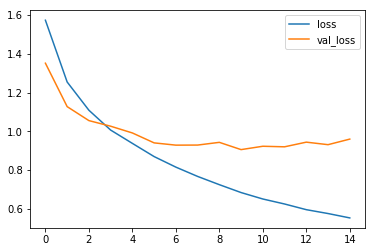

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

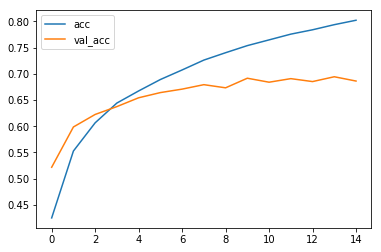

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[741  16  36  26  12   2   6  11 113  37]
 [ 14 781   9   9   2   4   6   2  47 126]
 [ 62   9 545  91 102  66  50  29  28  18]
 [ 20   9  51 548  51 171  58  33  30  29]
 [ 40  10  62  79 617  43  47  78  19   5]
 [ 15   2  52 214  38 572  13  55  21  18]
 [  6   9  45 101  43  44 711   7  18  16]
 [ 24   3  38  48  59  64   5 726   6  27]
 [ 49  30   9  17   6   3   1   3 865  17]
 [ 35 105  16  19   4   7   1  11  46 756]]


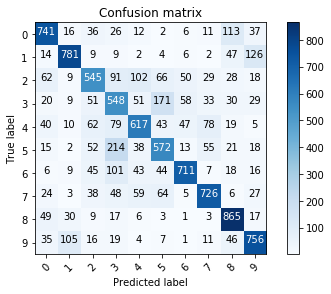

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

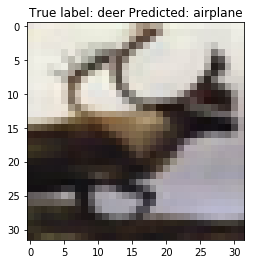

In [0]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));